# Fashion MNIST Classification: TensorFlow Solution

**Source (all credits to):** *TensorFlow Documentation*

<img src="../resources/fashion.png" style="width:50%">

# 1. Import Libraries

In [68]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf

print("We're using TensorFlow", tf.__version__)
print("We're using Keras", tf.keras.__version__)

We're using TensorFlow 2.4.1
We're using Keras 2.4.0


# 2. Prepare Data

In [69]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 3. EDA

In [70]:
train_images.dtype

dtype('uint8')

In [71]:
train_images.shape

(60000, 28, 28)

In [72]:
train_labels.shape

(60000,)

In [73]:
test_images.shape

(10000, 28, 28)

In [74]:
test_labels.shape

(10000,)

In [75]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

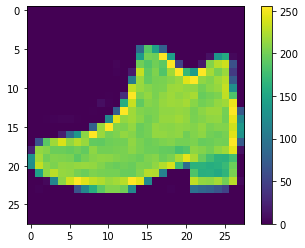

In [76]:
plt.figure()
plt.imshow(train_images[15])
plt.colorbar()
plt.grid(False)
plt.show()

# 4. Preprocess Data

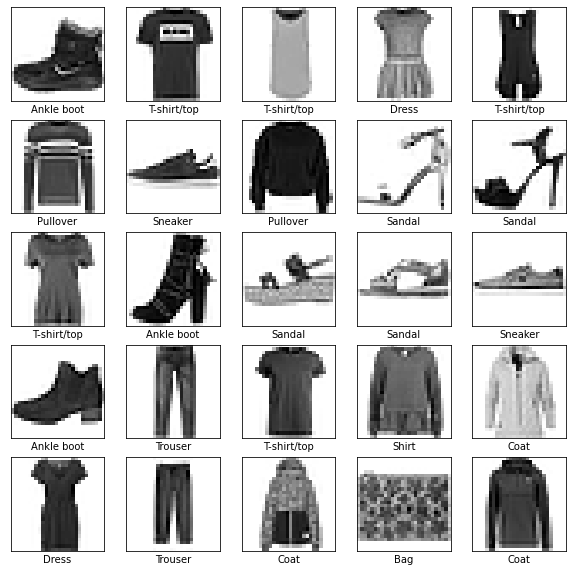

In [77]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot results
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 5. Build Neural Network

In [78]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels, epochs=10)

# evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 715us/step - loss: 0.6314 - accuracy: 0.7818
Epoch 2/10
1875/1875 [==============================] - 1s 687us/step - loss: 0.3819 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 1s 738us/step - loss: 0.3425 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 2s 820us/step - loss: 0.3180 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.2928 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 1s 701us/step - loss: 0.2767 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 1s 794us/step - loss: 0.2686 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.2581 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 2s 848us/step - loss: 0.2462 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 2s 906u

# 6. Make Predictions

In [79]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

prediction_example_0 = np.argmax(predictions[0])

label_example_0 = test_labels[0]

print('Prediction for example 0:', prediction_example_0) 
print('Label for example 0:', label_example_0)



Prediction for example 0: 9
Label for example 0: 9


# 7. Plot Predictions

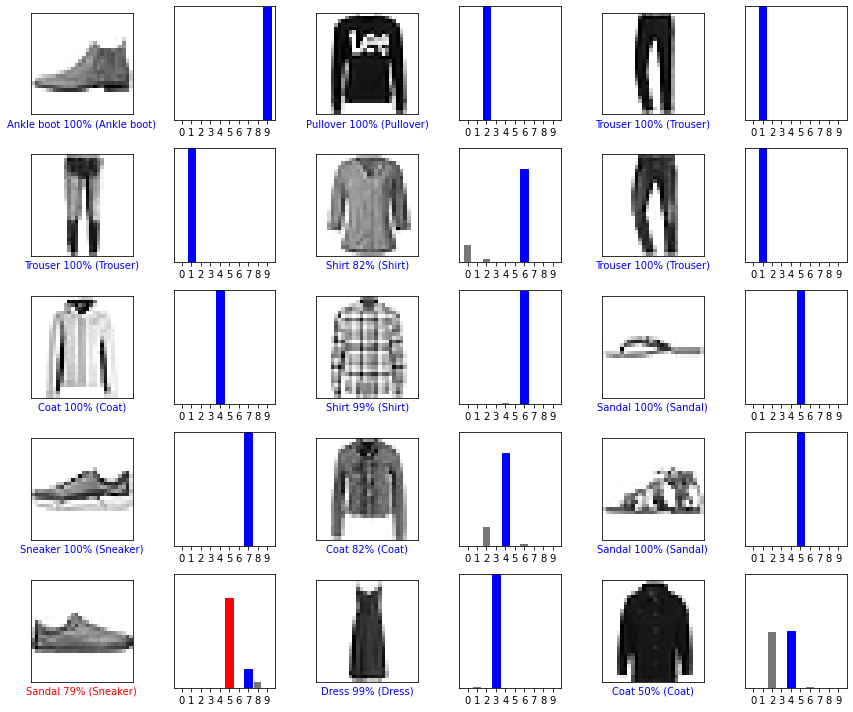

In [80]:
# plot the first X test images, their predicted labels, and the true labels
# color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 8. Predict an Item

(28, 28)
(1, 28, 28)

Prediction array: [[2.7694711e-09 9.9999750e-01 1.6108935e-11 2.0248701e-06 4.6300676e-07
  1.5021265e-13 9.8802222e-10 5.3680167e-13 6.9599326e-11 4.8134517e-11]]

Prediction result: 1 -> Trouser


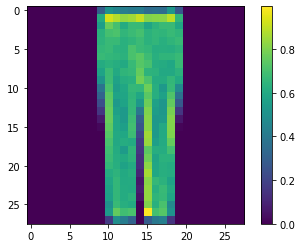

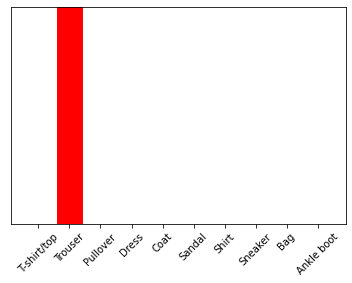

In [81]:
# grab an image from the test dataset
IMAGE_INDEX = 97
img = test_images[IMAGE_INDEX]

print(img.shape)

# add the image to a batch where it's the only member (keras optimization)
img = (np.expand_dims(img,0))

print(img.shape)

# predict image label
predictions_single = probability_model.predict(img)

print()
print('Prediction array:', predictions_single)

prediction_result = np.argmax(predictions_single[0])
prediction = lambda prediction_result : class_names[prediction_result]

print()
print('Prediction result: %i -> %s' % (prediction_result, prediction(prediction_result)))

# plot the image
plt.figure()
plt.imshow(test_images[IMAGE_INDEX])
plt.colorbar()
plt.grid(False)
plt.show()

# plot results
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# 9. Used Functions

In [82]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')